# 2022-07-22

In [3]:
import random 
from itertools import permutations 
alltours = permutations 

def distance_tour(atour) : return sum(distance_points(atour[i-1], atour[i]) for i in range(len(atour)))

acity = complex 

def distance_points(first, second) : return abs(first-second) # first 벡터와 second 벡터 사이 유클리드 거리 계산하는 함수 

def generate_cities(number_of_cities) : 
    seed = 10 
    width = 500
    height = 300 
    random.seed((number_of_cities, seed))

    return frozenset(
        # x 축에서 랜덤하게 좌표 생성
        acity(random.randint(1, width), 
        # y 축에서 랜덤하게 좌표 생성 
        random.randint(1, height)) 
        # 도시 수 만큼 반복해서 벡터 생성(중복 frozenset으로 제거)
        for c in range(number_of_cities))

In [8]:
def brute_force(cities) : return shortest_tour(alltours(cities)) # 여러 투어 중에 최소 투어 찾아라
def shortest_tour(tours) : return min(tours , key = distance_tour) # 총 거리 최소인 투어 반환

import matplotlib.pyplot as plt 

def visualize_tour(tour) : 
    if len(tour) > 1000 : plt.figure(figsize=(15,10)) # 투어 크기 일정 이상 커지면, 전체 이미지 크기 조정 
    start = tour[0:1]
    visualize_segment(tour+start)
    visualize_segment(start, 'rD')

def visualize_segment(segment, style='bo-') : 
    plt.plot([x(c) for c in segment], [y(c) for c in segment], style)
    plt.axis('scaled')
    plt.axis('off')

def x(c): return c.real 
def y(c) : return c.imag

무차별 대입 전략 : 10 cities => tour length : 1267 (in 10.1483 sec)


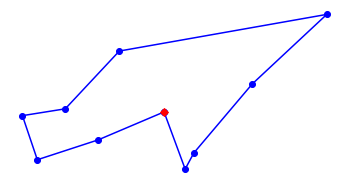

In [9]:
from collections import Counter 
import time 

def tsp(algorithm, cities) : 
    t0 = time.perf_counter() # 알고리듬 시작시간
    tour = algorithm(cities) # 거리 최소인 투어 산출.
    t1 = time.perf_counter() # 알고리듬 종료시간 

    # 결과 경로가 모든 도시 한번씩만 방문했는지 검증 
    assert Counter(tour) == Counter(cities)

    # 결과 경로 시각화 
    visualize_tour(tour)

    # 결과 
    print(f'무차별 대입 전략 : {len(cities)} cities => tour length : {round(distance_tour(tour))} (in {round(t1-t0,4)} sec)')

tsp(brute_force, generate_cities(10))